### <b> Model-Agnostic Meta Learning algorithm (MAML) </b>

In [149]:
"""setup information"""
import torch
import matplotlib.pyplot as plt
import maml
import Data
import importlib as imp
import numpy as np
import encoder
"""dataset split as specified by the authors"""
train_class_names = [
    'train', 'skyscraper', 'turtle', 'raccoon', 'spider', 'orange', 'castle', 'keyboard',
    'clock', 'pear', 'girl', 'seal', 'elephant', 'apple', 'aquarium_fish', 'bus',
    'mushroom', 'possum', 'squirrel', 'chair', 'tank', 'plate', 'wolf', 'road', 'mouse',
    'boy', 'shrew', 'couch', 'sunflower', 'tiger', 'caterpillar', 'lion', 'streetcar',
    'lawn_mower', 'tulip', 'forest', 'dolphin', 'cockroach', 'bear', 'porcupine', 'bee',
    'hamster', 'lobster', 'bowl', 'can', 'bottle', 'trout', 'snake', 'bridge',
    'pine_tree', 'skunk', 'lizard', 'cup', 'kangaroo', 'oak_tree', 'dinosaur', 'rabbit',
    'orchid', 'willow_tree', 'ray', 'palm_tree', 'mountain', 'house', 'cloud'
    ]
valid_class_names = [
    'otter', 'motorcycle', 'television', 'lamp', 'crocodile', 'shark', 'butterfly', 'sea',
    'beaver', 'beetle', 'tractor', 'flatfish', 'maple_tree', 'camel', 'crab', 'cattle'
    ]
test_class_names = [
    'baby', 'bed', 'bicycle', 'chimpanzee', 'fox', 'leopard', 'man', 'pickup_truck',
    'plain', 'poppy', 'rocket', 'rose', 'snail', 'sweet_pepper', 'table', 'telephone',
    'wardrobe', 'whale', 'woman', 'worm'
    ]

In [148]:
# import encoder_mod
# imp.reload(encoder_mod)
# nn1 = encoder_mod.InferenceNetwork(number_of_ways=5, max_shots=9, input_channels=3, hidden_channels=10,
#                                    use_omega=False, use_gamma=True, use_zeta=True)
# nn1.to('cuda')
# import Data
# dl = Data.get_dataloader(train_class_names, 50, 15, 5, 9, 4, False)
# # x = torch.ones(size=(7, 3, 32, 32))
# # y = torch.zeros(size=(7, 1))
# for i, task_batch in enumerate(dl):
#     for task in task_batch:
#         x, y, _, _ = task
#         print(x.shape)
#         print(y.shape)
#         # print(y)
#         result = nn1(x, y[:, None])
#         print(result)
#         break
#     break

torch.Size([250, 3, 32, 32])
torch.Size([250])
	stage 1 result:  torch.Size([5, 256])
omega:  torch.Size([5]) torch.Size([5])
(Normal(loc: torch.Size([5]), scale: torch.Size([5])), Normal(loc: torch.Size([5]), scale: torch.Size([5])), Normal(loc: torch.Size([256]), scale: torch.Size([256])))


Starting training at iteration 0.
Iteration 0: loss: 1.380, pre-adaptation support accuracy: 0.225, post-adaptation support accuracy: 0.490, post-adaptation query accuracy: 0.437
Validation: loss: 1.499, pre-adaptation support accuracy: 0.199, post-adaptation support accuracy: 0.441, post-adaptation query accuracy: 0.381
Iteration 10: loss: 1.404, pre-adaptation support accuracy: 0.233, post-adaptation support accuracy: 0.452, post-adaptation query accuracy: 0.423
Iteration 20: loss: 1.424, pre-adaptation support accuracy: 0.223, post-adaptation support accuracy: 0.485, post-adaptation query accuracy: 0.420
Iteration 30: loss: 1.346, pre-adaptation support accuracy: 0.193, post-adaptation support accuracy: 0.492, post-adaptation query accuracy: 0.430
Iteration 40: loss: 1.436, pre-adaptation support accuracy: 0.174, post-adaptation support accuracy: 0.507, post-adaptation query accuracy: 0.477
Iteration 50: loss: 1.494, pre-adaptation support accuracy: 0.224, post-adaptation support ac

Text(0.5, 1.0, 'valid accuracy')

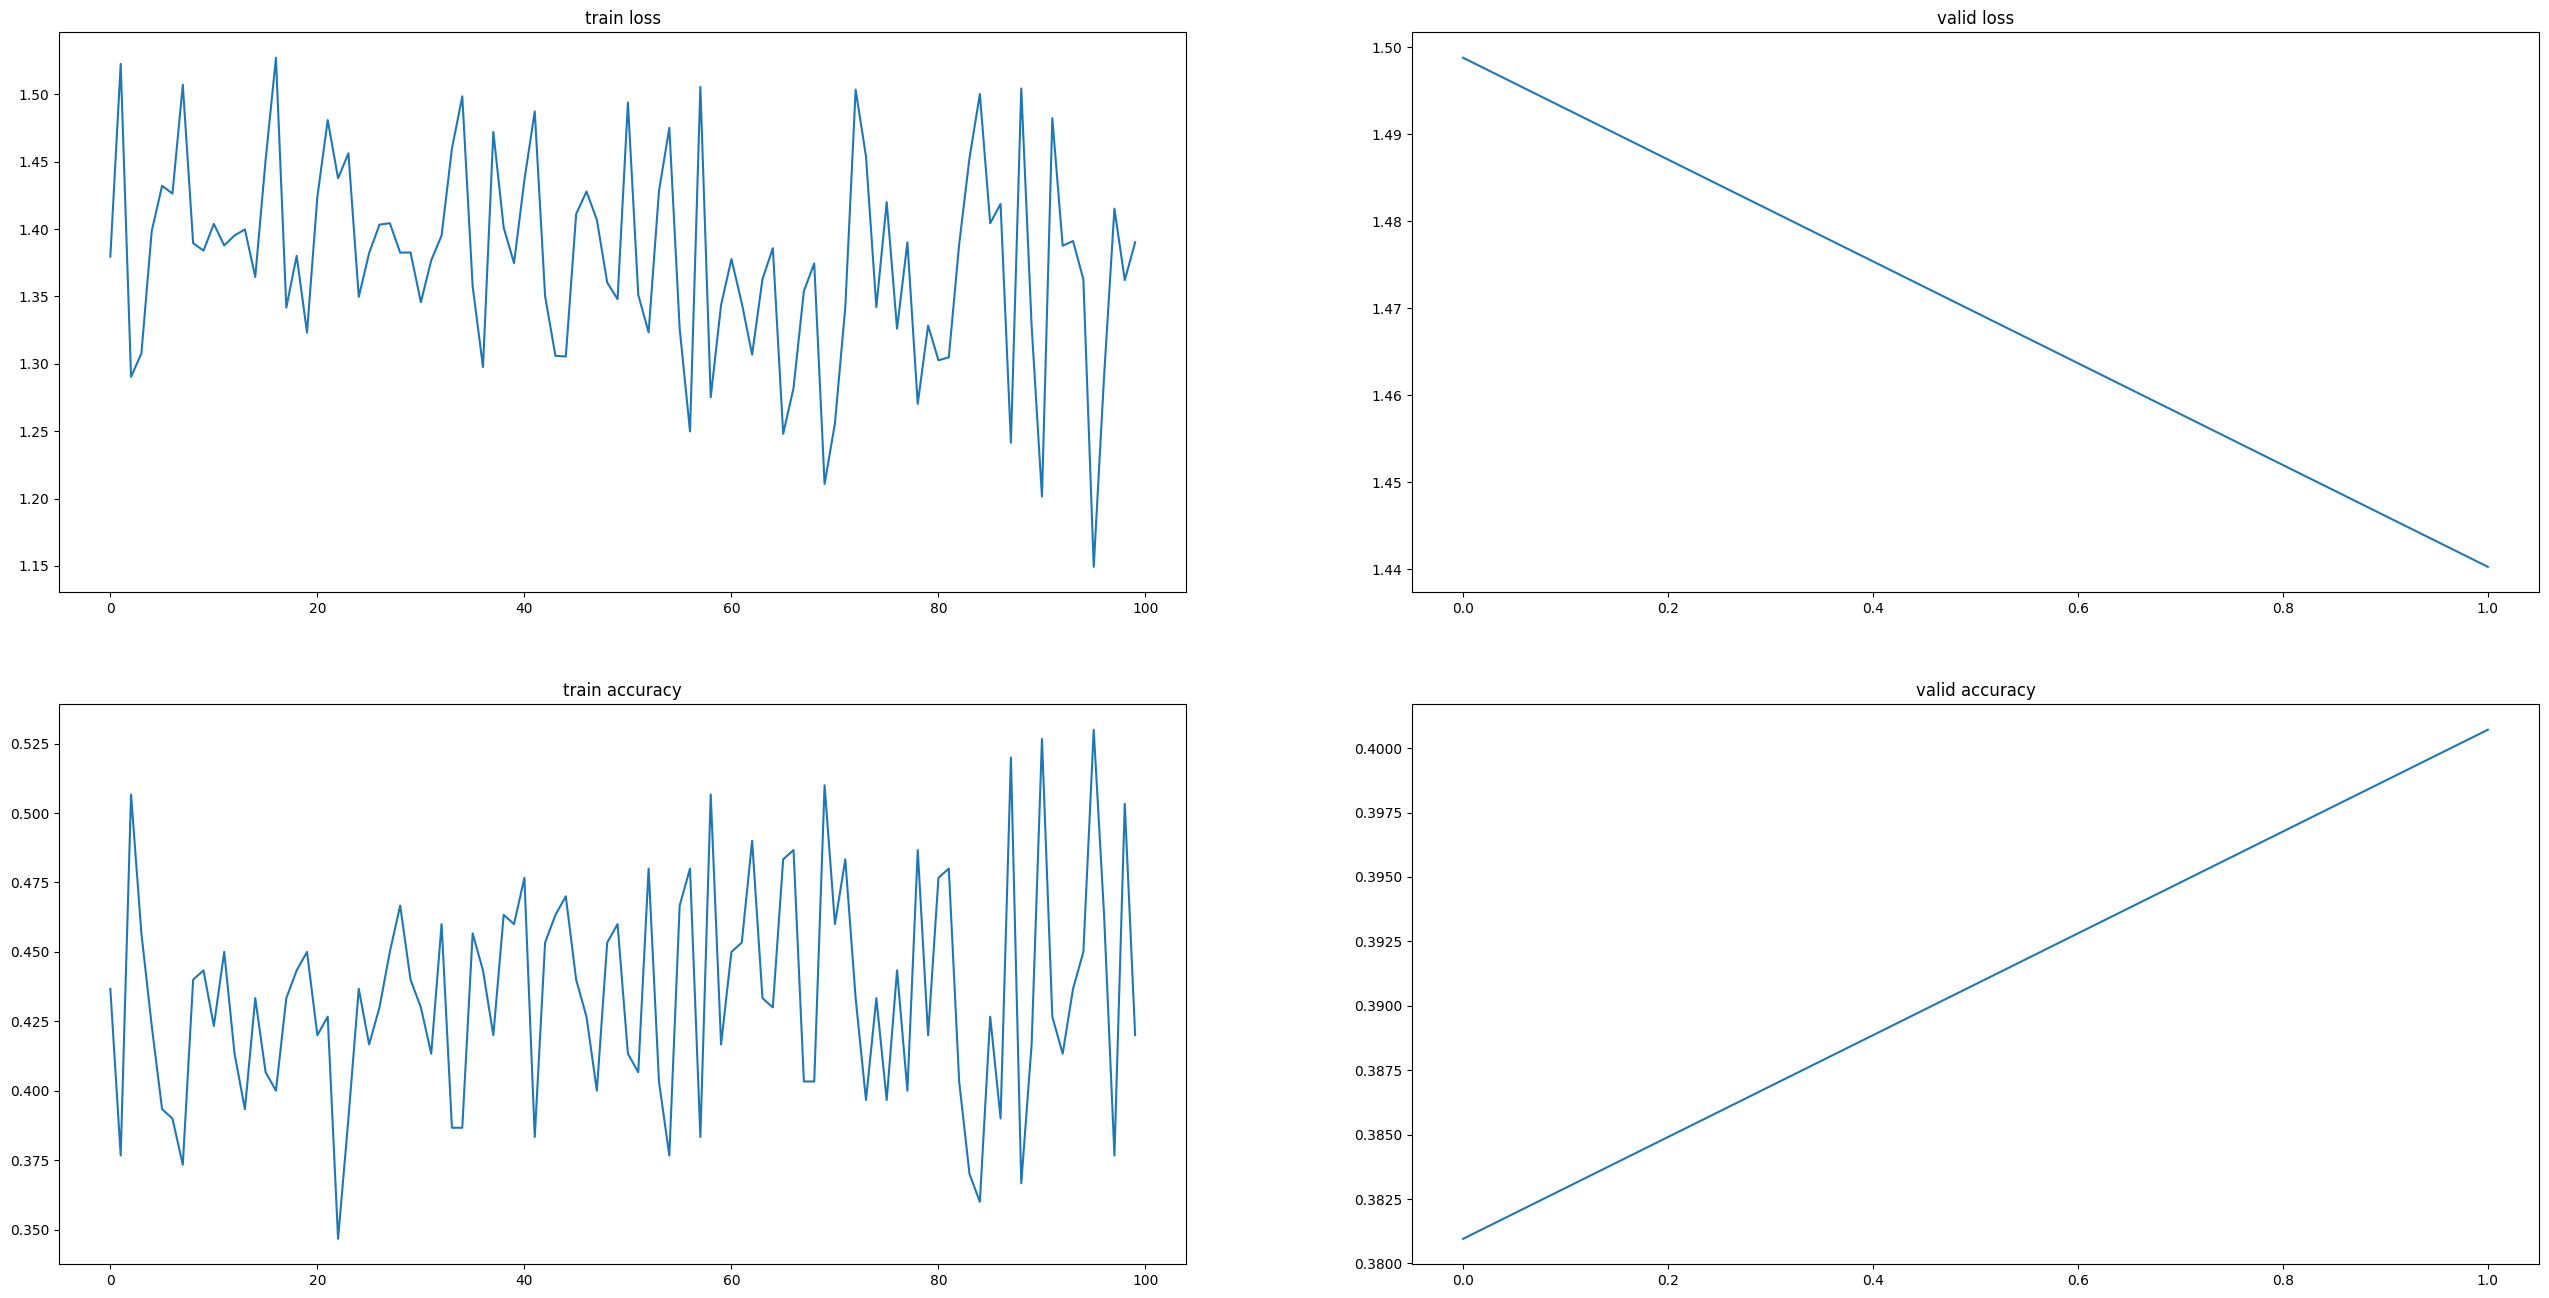

In [155]:
# to run: jupyter nbconvert --execute --to notebook TAML_notebook.ipynb
imp.reload(maml)
imp.reload(encoder)
imp.reload(Data)
number_of_inner_gradient_steps: int = 5
ways: int = 5 # 5
max_shots: int = 50 # 50
query: int = 15 # 15
iterations = 10000 # epochs， 1000
inner_learning_rate: float = 0.5
outer_learning_rate: float = 1e-3
batch_size = 4 # how many tasks in this batch
total_train_task = batch_size * iterations
valid_interval = 7 # was 50
total_valid_task = batch_size * int(iterations / valid_interval)
total_test_task = 600 # 600
imbalance = False
m = maml.MAML(num_outputs=ways, 
            num_inner_steps=number_of_inner_gradient_steps,
            inner_lr=inner_learning_rate, learn_inner_lrs=False, 
            outer_lr=outer_learning_rate)
# m._view_model(m._meta_parameters)
loss_list, accuracy_list, valid_loss, valid_accuracy = m.train(
    dataloader_train=Data.get_dataloader(train_class_names, max_shots, query, ways, total_train_task, batch_size, imbalance),
    dataloader_val=Data.get_dataloader(valid_class_names, max_shots, query, ways, total_valid_task, batch_size, imbalance),
    writer=None)
# test_loss, test_accuracy = m.test( 
#     dataloader_test =Data.get_dataloader(test_class_names,  max_shots, query, ways, total_valid_task, batch_size, imbalance))
# plot results:
f, ax = plt.subplots(figsize=(32, 16), nrows=2, ncols=2)
# plot train
ax[0, 0].plot(loss_list)
ax[0, 0].set_title("train loss")
ax[1, 0].plot(accuracy_list)
ax[1, 0].set_title("train accuracy")
# plot valid
ax[0, 1].plot(valid_loss)
ax[0, 1].set_title("valid loss")
ax[1, 1].plot(valid_accuracy)
ax[1, 1].set_title("valid accuracy")